### Simple Example for Fitting a Generalized Linear Model (GLM) 

This notebook is designed to help users get started using the glm-hmm package to fit GLMs to their data. Here we use simulated data so that we can check that we are inferring the correct model parameters, but the same fitting procedure applies when using real experimental data. The code currently supports GLMs for logistic (Bernoulli distribution) and multinomial regression, with more hopefully to come.

#### 1. Import the required code packages and modules.

In [1]:
import sys
import numpy as np
sys.path.append("/Users/irisstone/Google Drive (istone@princeton.edu)/Princeton/Research/Striatum Towers Task/code/glmhmm")
import matplotlib.pyplot as plt
from glmhmm import glm
import time

#### 2. Set the hyper-parameters of the GLM.

In [2]:
N = 500000 # number of data/time points
M = 6 # number of input features
C = 3 # number of observation classes

#### 3. Instantiate the model and generate the true parameters and some data.

In [3]:
# make a GLM with these parameters and set distribution type
true_GLM = glm.GLM(N,M,C,observations="multinomial")
true_x,true_w,true_y = true_GLM.generate_data()

#### 4. Compute the true log-likelihood of the model.

In [4]:
true_ll = true_GLM.neglogli(true_x,true_w,true_y) * -1

#### 5. Initialize some weights and fit the GLM to the data.

In [5]:
w_init = true_GLM.init_weights()
w, phi = true_GLM.fit(true_x,w_init,true_y)

In [6]:
fit_ll = true_GLM.ll
fit_ll = true_GLM.neglogli(true_x,w,true_y) * -1

#### 7. Compare the inferred weights to the true weights.

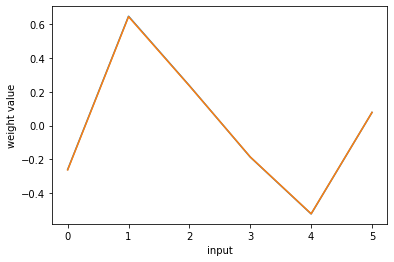

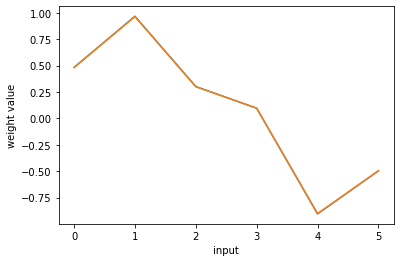

In [7]:
for i in range(1,C):
    plt.figure()
    plt.plot(true_w[:,i])
    plt.plot(w[:,i])
    plt.xlabel('input')
    plt.ylabel('weight value')

#### 8. Compare the inferred log-likelihood to the true value.

In [8]:
# compare loglikelihoods
print('True LL: %f' %(true_ll))
print('Fit LL: %f' %(fit_ll))

True LL: -142343.360625
Fit LL: -142338.445882


In [12]:
true_GLM.neglogli(true_x,np.round(true_w,2),true_y) * -1

-142425.14838480848

In [11]:
true_GLM.neglogli(true_x,np.round(w,2),true_y) * -1

-142391.79564704318

In [43]:
w

array([[ 0.        ,  0.35559627, -0.26284846],
       [ 0.        , -0.13663665, -0.90332484],
       [ 0.        , -0.23738219, -0.95392178],
       [ 0.        , -0.54299597, -0.50040452],
       [ 0.        ,  0.4471069 ,  0.83022123],
       [ 0.        ,  0.74225502,  0.58139888]])